In [11]:
import numpy as np
import pandas as pd
import pickle
import re
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_palette('pastel')

In [3]:
# df_list = pickle.load(open('./scraping/dflist.p', 'rb'))
# df = pickle.load(open('./scraping/df.p', 'rb'))

In [4]:
# df = pd.merge(df, df_list, on='title')

In [5]:
# df.rename(columns={
#     'minP_r': 'minPlayers_Real',
#     'maxP_r': 'maxPlayers_Real',
#     'minP_u': 'minPlayers_Poll',
#     'maxP_u': 'maxPlayers_Poll',
#     'minT_r': 'time_low',
#     'maxT_r': 'time_high',
#     'age_r': 'min_age'
#     }, inplace=True)
# df = df.astype({
#     'minPlayers_Real': float,
#     'maxPlayers_Real': float,
#     'minPlayers_Poll': float,
#     'maxPlayers_Poll': float,
#     'time_low': float,
#     'time_high': float,
#     'min_age': float,
#     'weight': float,
#     'numRatings': float,
#     'rating': float,
#     'geekrating': float,
#     'owned': float,
#     'wishlist': float,
#     'prev_owned': float,
#     'comments': float,
#     'plays_total': float,
#     'year': int,
#     'rank': int
#     })
# df['time'] = (df.time_low + df.time_high)/2
# df.drop(['time_low', 'time_high', 'primDesign'], axis=1, inplace=True)
# df.maxPlayers_Poll.fillna(df.maxPlayers_Real, inplace=True)
# # pickle.dump(df, open('df.p', 'wb'))
df = pickle.load(open('./df.p', 'rb'))


In [6]:
# prolific = df.designers.explode().value_counts().head(20).index.tolist()
# top = df.designers.head(20).explode().value_counts().index.tolist()
# list(set(top) & set(prolific))

In [7]:
x = df[['time', 'year', 'minPlayers_Poll', 'weight', 'rank']].copy()
x['>2015'] = np.where(df.year >= 2015, 1, 0)
x['>2010'] = np.where(df.year >= 2010, 1, 0)
x['>2000'] = np.where(df.year >= 2000, 1, 0)
x.drop(columns=['year'], inplace=True)
X = sm.add_constant(x)
y = df.owned


In [8]:
sm.OLS(y,X).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  owned   R-squared:                       0.312
Model:                            OLS   Adj. R-squared:                  0.307
Method:                 Least Squares   F-statistic:                     62.72
Date:                Sun, 31 Jul 2022   Prob (F-statistic):           2.00e-74
Time:                        19:08:52   Log-Likelihood:                -10880.
No. Observations:                 977   AIC:                         2.178e+04
Df Residuals:                     969   BIC:                         2.182e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            5.861e+04   3889.826     15.067      0.000     5.1e+04    6.62e+04
time              -14.0519     12.428     -1.131      0.258     -38.441      10.337
minPlayers_Poll  -564.5172    662.636     -0.852      0.394   -1864.883     735.849
weight          -6840.5196    933.966     -7.324      0.000   -8673.349   -5007.690
rank              -36.8873      1.914    -19.273      0.000     -40.643     -33.131
>2015           -6516.8596   1330.985     -4.896      0.000   -9128.804   -3904.915
>2010            -967.7699   1666.681     -0.581      0.562   -4238.490    2302.951
>2000            1285.7506   2540.807      0.506      0.613   -3700.367    6271.868
==============================================================================
Omnibus:                      786.998   Durbin-Watson:                   1.692
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            19704.350
Skew:                           3.544   Prob(JB):                         0.00
Kurtosis:                      23.828   Cond. No.                     4.59e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.59e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [29]:
y = df.rating.rank(pct=True)
X.drop(columns='rank', inplace=True)
sm.OLS(y,X).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 rating   R-squared:                       0.425
Model:                            OLS   Adj. R-squared:                  0.421
Method:                 Least Squares   F-statistic:                     119.3
Date:                Sun, 31 Jul 2022   Prob (F-statistic):          8.89e-113
Time:                        19:45:33   Log-Likelihood:                 97.490
No. Observations:                 977   AIC:                            -181.0
Df Residuals:                     970   BIC:                            -146.8
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -0.0810      0.048     -1.703      0.089      -0.174       0.012
time                0.0005      0.000      3.107      0.002       0.000       0.001
minPlayers_Poll    -0.0153      0.009     -1.747      0.081      -0.032       0.002
weight              0.1717      0.012     14.316      0.000       0.148       0.195
>2015               0.1918      0.018     10.932      0.000       0.157       0.226
>2010               0.0289      0.022      1.314      0.189      -0.014       0.072
>2000               0.0009      0.033      0.028      0.978      -0.065       0.067
==============================================================================
Omnibus:                       15.411   Durbin-Watson:                   1.334
Prob(Omnibus):                  0.000   Jarque-Bera (JB):                9.572
Skew:                           0.066   Prob(JB):                      0.00834
Kurtosis:                       2.533   Cond. No.                         725.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

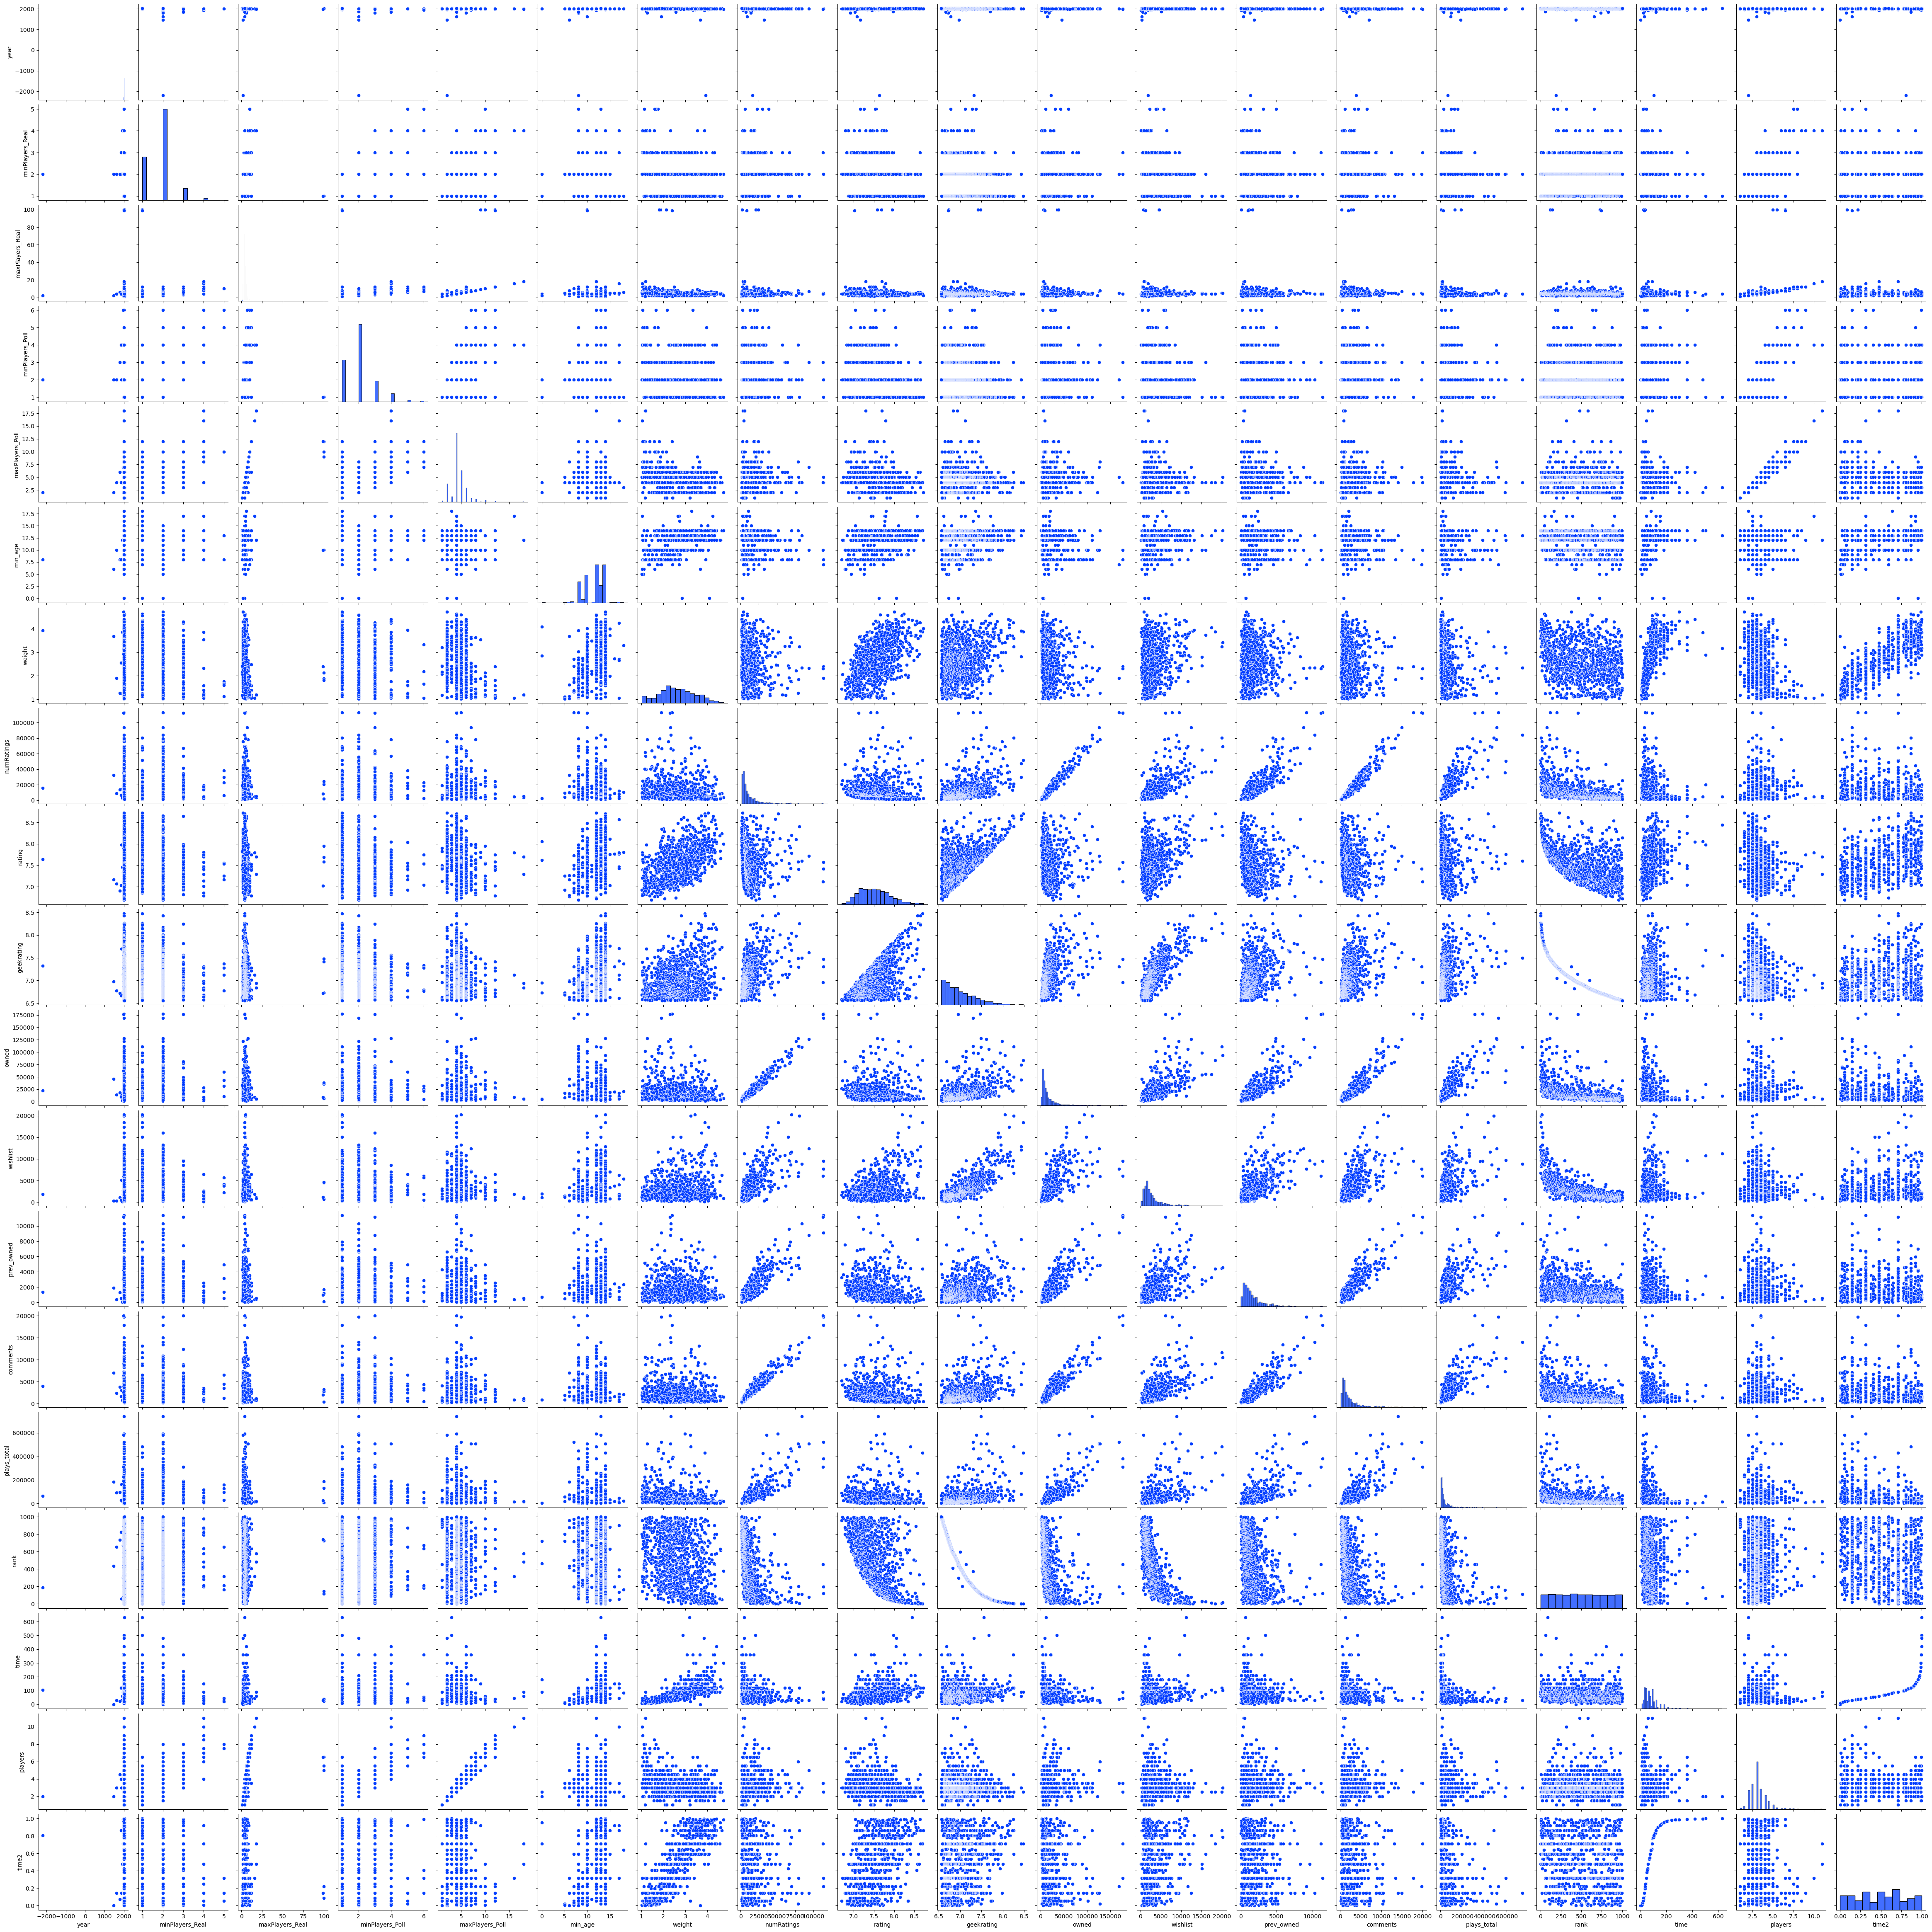

In [86]:
sns.pairplot(data=df)

<AxesSubplot:xlabel='owned', ylabel='rating2'>

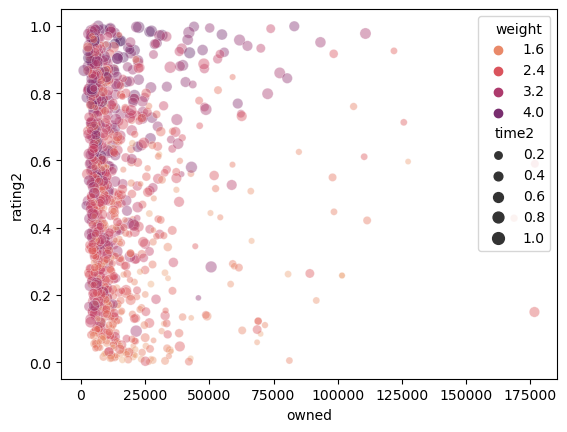

In [89]:
# sns.regplot(x='rank', y='owned', data=df, marker='.')
df['players'] = (df.minPlayers_Poll + df.maxPlayers_Poll)/2
df['time2'] = df.time.rank(pct=True)
df['rating2'] = df.rating.rank(pct=True)
sns.set_palette('bright')
sns.scatterplot(x='owned', y='rating2', data=df, marker='o', size='time2', hue='weight', alpha=.42, palette='flare')


In [41]:
df.columns

Index(['title', 'year', 'minPlayers_Real', 'maxPlayers_Real',
       'minPlayers_Poll', 'maxPlayers_Poll', 'min_age', 'desc', 'weight',
       'numRatings', 'rating', 'geekrating', 'owned', 'wishlist', 'prev_owned',
       'comments', 'plays_total', 'designers', 'categories', 'mechanics',
       'rank', 'gamepage', 'time'],
      dtype='object')